In [1]:
from PIL import Image
import os
import numpy as np
import time
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
base_dir = 'D:/download/kaggle/dataset'
train_dir = os.path.join(base_dir, 'D:/download/kaggle/dataset/train')
validation_dir = os.path.join(base_dir, 'D:/download/kaggle/dataset/validation')
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures
 
num_cats_tr = len(os.listdir(train_cats_dir))  # total training cat images: 1000
num_dogs_tr = len(os.listdir(train_dogs_dir))  # total training dog images: 1000
 
num_cats_val = len(os.listdir(validation_cats_dir))  # total validation cat images: 500
num_dogs_val = len(os.listdir(validation_dogs_dir))  # total validation dog images: 500
 
total_train = num_cats_tr + num_dogs_tr  # Total training images: 2000
total_val = num_cats_val + num_dogs_val  # Total validation images: 1000

In [3]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [4]:
# 生成我们的训练数据集和验证数据集
train_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)
validation_image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

In [5]:

# 在为训练和验证图像定义生成器之后，flow_from_directory方法从磁盘加载图像，应用重新缩放，并将图像调整到所需的尺寸。
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')
# output:Found 2000 images belonging to 2 classes.
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')
# output:Found 1000 images belonging to 2 classes.

Found 2001 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


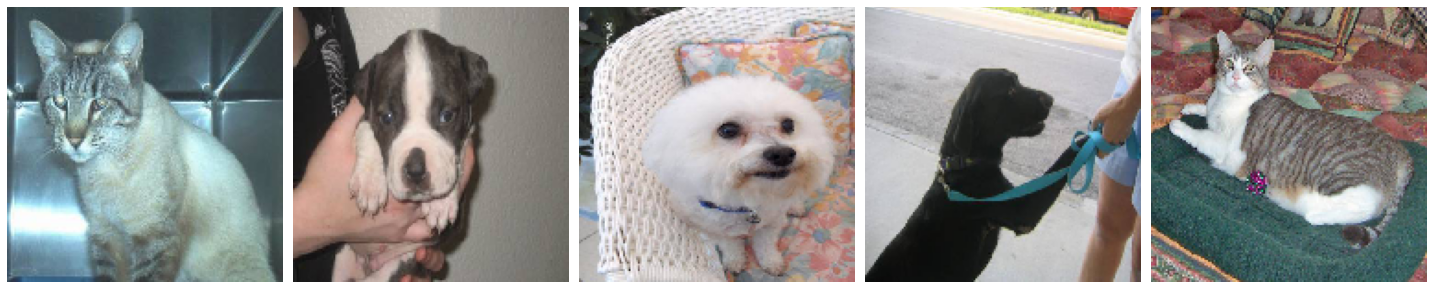

In [7]:
sample_training_images, _ = next(train_data_gen)
# next函数：从数据集中返回一个批处理。
# 返回值：(x_train，y_train)的形式，其中x_train是训练特征，y_train是其标签。丢弃标签，只显示训练图像。
 
# 该函数将图像绘制成1行5列的网格形式，图像放置在每一列中。
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
 
 
plotImages(sample_training_images[:5])

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()        # 查看网络的所有层

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [10]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 11s 754ms/step - loss: 1.0629 - accuracy: 0.5190 - val_loss: 0.6920 - val_accuracy: 0.5011
Epoch 2/15
15/15 [==============================] - 11s 721ms/step - loss: 0.6837 - accuracy: 0.4987 - val_loss: 0.6755 - val_accuracy: 0.5000
Epoch 3/15
15/15 [==============================] - 11s 763ms/step - loss: 0.6456 - accuracy: 0.5729 - val_loss: 0.6357 - val_accuracy: 0.5670
Epoch 4/15
15/15 [==============================] - 11s 723ms/step - loss: 0.6188 - accuracy: 0.6305 - val_loss: 0.6343 - val_accuracy: 0.5614
Epoch 5/15
15/15 [==============================] - 11s 750ms/step - loss: 0.5697 - accuracy: 0.6791 - val_loss: 0.6138 - val_accuracy: 0.6953
Epoch 6/15
15/15 [==============================] - 12s 807ms/step - loss: 0.5231 - accuracy: 0.7256 - val_loss: 0.5779 - val_accuracy: 0.6975
Epoch 7/15
15/15 [==============================] - 12s 778ms/step

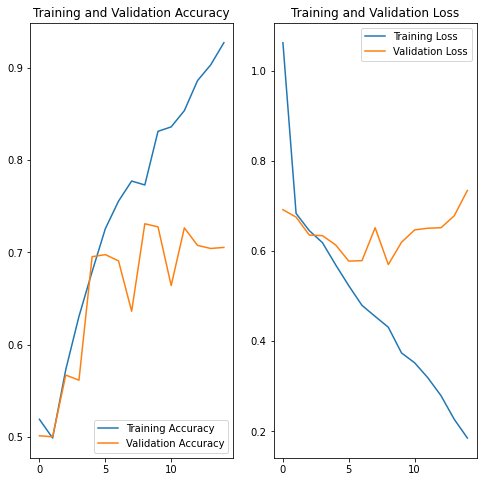

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
 
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs_range = range(epochs)
 
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
 
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()